In [1]:
import numpy as np
import pandas as pd

In [77]:
#Importação dos Dados train/val
data_t = pd.read_csv('E:\EEP\IA\wineQuality_train.data', sep = ",")
data_v   = pd.read_csv('E:\EEP\IA\wineQuality_val.data', sep = ",")

In [43]:
#remover
#data_t = data_t[:3]
data_t

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.33,0.30,3.3,0.034,30.0,102.0,0.9912,3.08,0.31,12.3,1
1,6.0,0.39,0.17,12.0,0.046,65.0,246.0,0.9976,3.15,0.38,9.0,0
2,7.9,0.18,0.49,5.2,0.051,36.0,157.0,0.9953,3.18,0.48,10.6,0


In [78]:
#Separacao
X = data_t.drop('quality', 1)
Y = np.array( data_t['quality'])

In [20]:
#Normalização dos Dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data_t)

[[ 0.12838815  0.33968311 -0.15220389 -0.94605155 -1.35508101 -0.89426761
  -1.11801281 -1.32224616 -1.35244738 -1.14676436  1.23692674  1.41421356]
 [-1.28388148  1.01904933 -1.14152915  1.38337727  0.32708852  1.39592993
   1.30903008  1.09557539  0.31822291 -0.14334554 -1.21218821 -0.70710678]
 [ 1.15549333 -1.35873244  1.29373304 -0.43732572  1.02799249 -0.50166232
  -0.19101726  0.22667077  1.03422447  1.2901099  -0.02473853 -0.70710678]]
[1 0 0]


In [21]:
#Verificação de Tipo
print(type(X)) 
print(type(Y)) 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


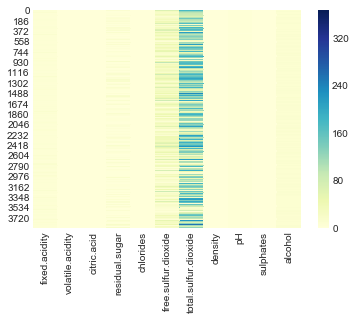

In [79]:
#analise de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = data_t.corr()
sns.heatmap(X, cmap="YlGnBu")


In [74]:
def WineQuality(x):
    if x < 7 :
        return '0'
        print(x)
    else:
        return '1'
        print(x)

data_t['quality2'] = data_t['quality'].apply(lambda x : WineQuality(x))

In [68]:
data_t[:3]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.1,0.33,0.30,3.3,0.034,30.0,102.0,0.9912,3.08,0.31,12.3,1,0
1,6.0,0.39,0.17,12.0,0.046,65.0,246.0,0.9976,3.15,0.38,9.0,0,0
2,7.9,0.18,0.49,5.2,0.051,36.0,157.0,0.9953,3.18,0.48,10.6,0,0
